 Filtering with the Sobel operator can compute the gradient. Consider a image
(a) Using the existing filter2D to Sobel filter the image.



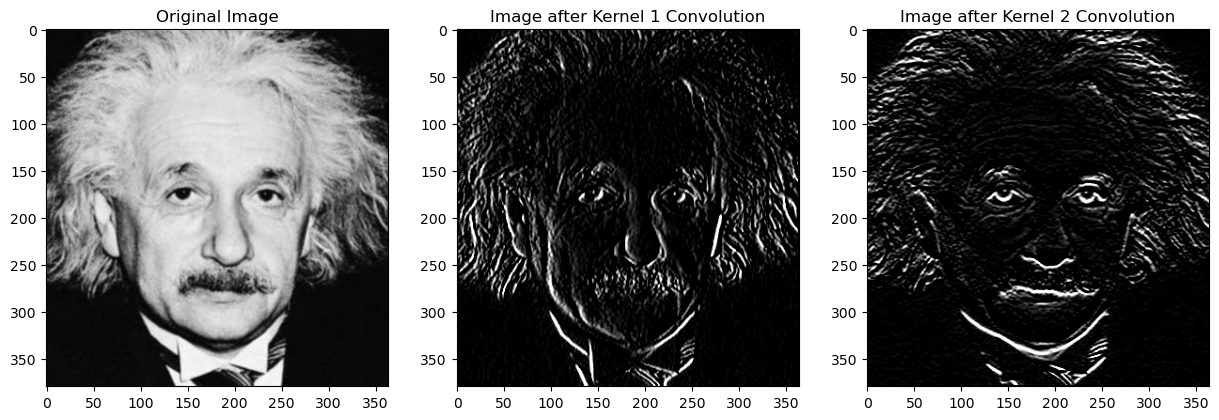

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
img = cv.imread("images/einstein.png")

# Define two convolution kernels for image filtering
ker1=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
ker2=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
# Apply the convolution operation with the first kernel
img1 = cv.filter2D(img, -1, ker1)

# Apply the convolution operation with the second kernel
img2 = cv.filter2D(img, -1, ker2)

# Create a 1x3 subplot for visualization
fig, ax = plt.subplots(1, 3, figsize=(15, 15))

# Display the original grayscale image in the first subplot
ax[0].imshow(img)
ax[0].set_title('Original Image')

# Display the result of the first kernel convolution in the second subplot
ax[1].imshow(img1)
ax[1].set_title('Image after Kernel 1 Convolution')

# Display the result of the second kernel convolution in the third subplot
ax[2].imshow(img2)
ax[2].set_title('Image after Kernel 2 Convolution')


plt.savefig('Q71.png')
# Show the plot
plt.show()



(b) Write your own code to Sobel filter the image.


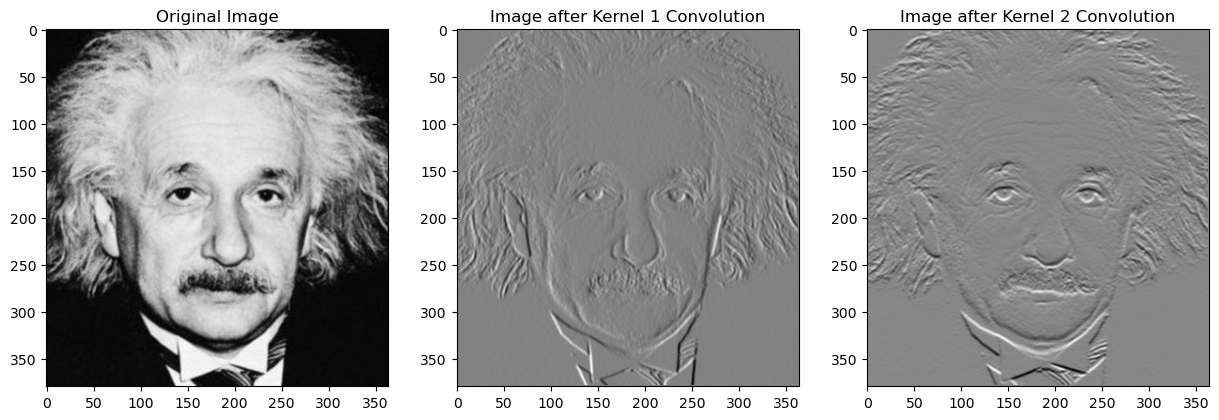

In [27]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

# Load the grayscale image
img = cv.imread('images\einstein.png', 0)

# Define Sobel kernels
ker1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
ker2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Function to apply convolution filter
def filter(image, kernel):
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1
    k_hh, k_hw = math.floor(kernel.shape[0] / 2), math.floor(kernel.shape[1] / 2)
    h, w = image.shape
    image_float = cv.normalize(image.astype(float), None, 0.0, 1.0, cv.NORM_MINMAX)
    result = np.zeros(image.shape, float)
    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            result[m, n] = np.dot(image_float[m - k_hh:m + k_hh + 1, n - k_hw:n + k_hw + 1].flatten(), kernel.flatten())
    return result

# Apply Sobel filters
img_1 = filter(img, ker1)
img_2 = filter(img, ker2)

# Create subplots for visualization
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(img_1, cmap="gray")
ax[1].set_title("Image after Kernel 1 Convolution")

ax[2].imshow(img_2, cmap="gray")
ax[2].set_title("Image after Kernel 2 Convolution")
plt.savefig('Q72.png')
plt.show()



(c) Using the property
[[1 0 -1],[2 0 -2],[1 0 -1]]=[1 2 1]*[1 0 -1]^T
carry out Sobel filtering.

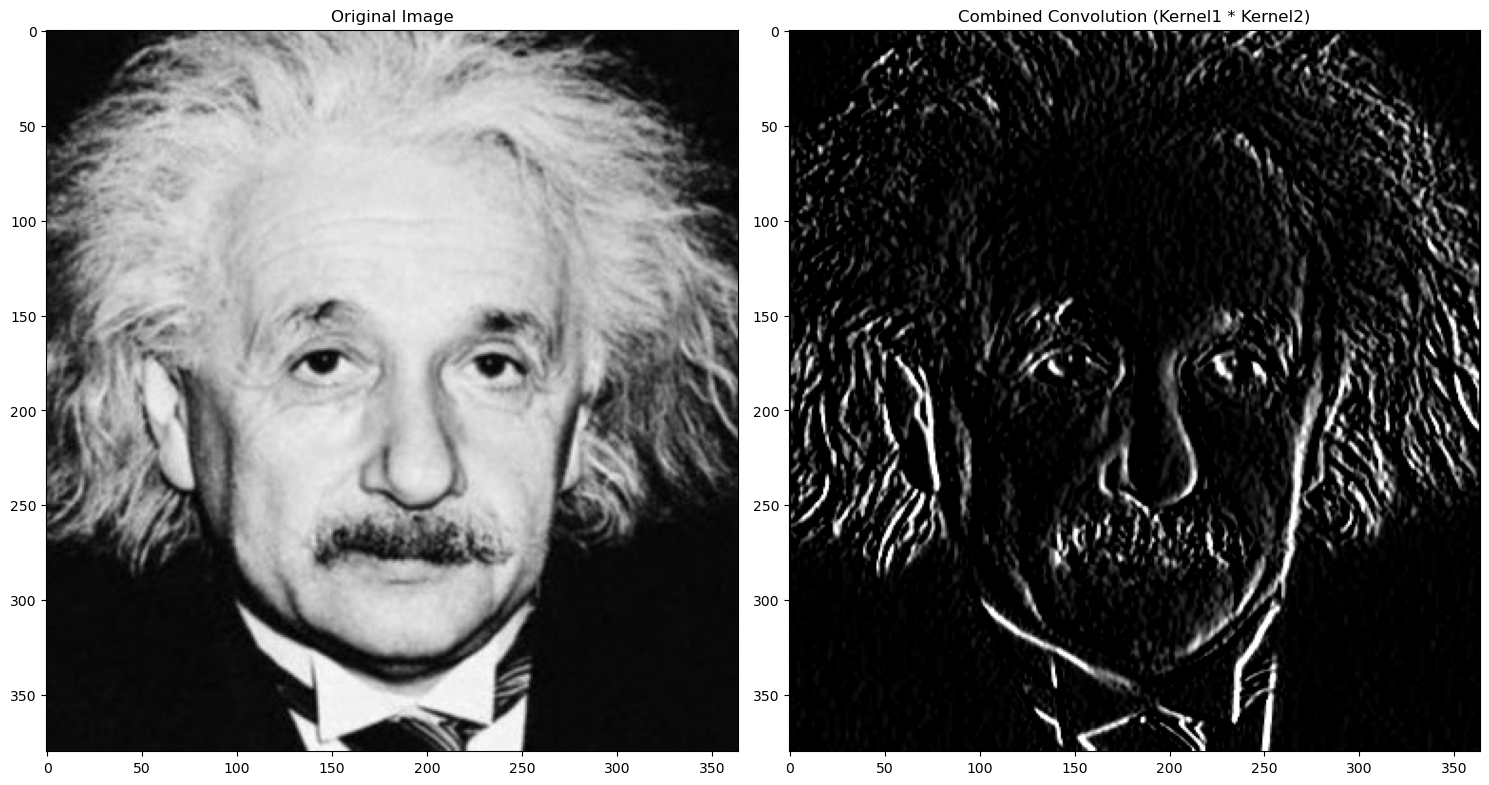

In [31]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the grayscale image
img = cv.imread('images/einstein.png', 0)

# Define two 1D kernels
kernel1 = np.array([[1], [2], [1]])
kernel2 = np.array([[1, 0, -1]])
kernel = kernel1*kernel2
# Apply the 1D convolutions
conv1 = cv.filter2D(img, -1, kernel)


# Visualize the images
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(conv1, cmap='gray')
ax[1].set_title('Combined Convolution (Kernel1 * Kernel2)')
plt.savefig('Q73.png')
plt.tight_layout()
plt.show()
